# K-means Clustering

K-means Clustering can be used for solving linearly separable classification problems. It constructs Voronoi cells for assigning K classes.

In [1]:
import numpy as np
import scipy
from scipy.spatial import distance_matrix
import copy


class Kmeans:
    def __init__(self, number_of_clusters):
        self.number_of_clusters = number_of_clusters
        self.cluster_centers = np.nan * np.ones(number_of_clusters)

    def fit(self, train_set):
        number_of_features = train_set.shape[1] - 1
        number_of_samples = train_set.shape[0]
        x_train = train_set[:, :number_of_features]
        y_train = train_set[:, number_of_features]
        if np.all(np.isnan(self.cluster_centers)):
            choice = np.random.choice(
                range(number_of_samples), replace=False, size=self.number_of_clusters
            )
            self.cluster_centers = x_train[choice]
        last_cluster_centers = copy.deepcopy(self.cluster_centers)
        distance_matrix_ = distance_matrix(x_train, self.cluster_centers)
        closest_cluster_indices = np.argmin(distance_matrix_, axis=1)
        for cluster_index in range(self.number_of_clusters):
            mask_cluster_points = closest_cluster_indices == cluster_index
            self.cluster_centers[cluster_index] = np.mean(
                x_train[mask_cluster_points], axis=0
            )
        if np.all(
            np.linalg.norm(self.cluster_centers - last_cluster_centers, axis=1) < 1e-4
        ):
            return self.cluster_centers
        else:
            return self.fit(train_set)

    def predict(self, test_set):
        number_of_features = test_set.shape[1] - 1
        number_of_samples = test_set.shape[0]
        x_test = test_set[:, :number_of_features]
        y_test = test_set[:, number_of_features]
        distance_matrix_ = distance_matrix(x_test, self.cluster_centers)
        closest_cluster_indices = np.argmin(distance_matrix_, axis=1)
        return closest_cluster_indices, self.cluster_centers

In [2]:
# generate test and train set
loc_a = 1
loc_b = -1.0
num_samples = 1000


def generate_data(inner_radius, outer_radius, target):
    random_nrs = np.random.normal(
        loc=0.0, scale=outer_radius, size=(50 * num_samples, 2)
    )
    radii = np.sqrt(np.sum(random_nrs ** 2, axis=1))
    mask_circle = np.logical_and(radii > inner_radius, radii < outer_radius)
    if np.sum(mask_circle) < num_samples:
        raise RuntimError("sample data could not be generated")
    random_nrs = random_nrs[mask_circle][:num_samples]
    return np.concatenate(
        (random_nrs, target * np.ones(shape=(num_samples, 1))), axis=1
    )


train_set = generate_data(inner_radius=0, outer_radius=2, target=0)
train_set = np.concatenate(
    (train_set, generate_data(inner_radius=3, outer_radius=4, target=1)), axis=0
)
test_set = generate_data(inner_radius=0, outer_radius=2, target=0)
test_set = np.concatenate(
    (train_set, generate_data(inner_radius=3, outer_radius=4, target=1)), axis=0
)


# simpler (linearly separable) set, just multivariate gaussians
train_set = np.concatenate(
    (
        np.concatenate(
            (
                np.random.normal(loc=(loc_a, loc_a), scale=1, size=(num_samples, 2)),
                np.ones(shape=(num_samples, 1)),
            ),
            axis=1,
        ),
        np.concatenate(
            (
                np.random.normal(loc=(loc_b, loc_b), scale=1, size=(num_samples, 2)),
                np.zeros(shape=(num_samples, 1)),
            ),
            axis=1,
        ),
    ),
    axis=0,
)
test_set = np.concatenate(
    (
        np.concatenate(
            (
                np.random.normal(loc=(loc_a, loc_a), scale=1, size=(num_samples, 2)),
                np.ones(shape=(num_samples, 1)),
            ),
            axis=1,
        ),
        np.concatenate(
            (
                np.random.normal(loc=(loc_b, loc_b), scale=1, size=(num_samples, 2)),
                np.zeros(shape=(num_samples, 1)),
            ),
            axis=1,
        ),
    ),
    axis=0,
)

# inplace shuffle
np.random.shuffle(test_set)
np.random.shuffle(train_set)

In [3]:
km = Kmeans(number_of_clusters=2)
km.fit(train_set)
closest_cluster_indices, cluster_centers = km.predict(test_set)

Text(0.5, 1.0, 'original labels')

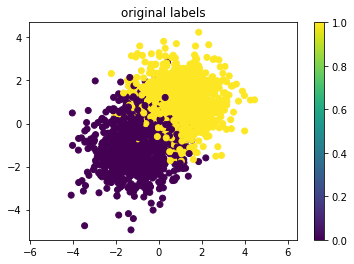

In [4]:
import matplotlib.pyplot as plt

plt.scatter(test_set[:, 0], test_set[:, 1], c=test_set[:, 2])
plt.colorbar()
plt.axis("equal")
plt.title("original labels")

Text(0.5, 1.0, 'predicted labels')

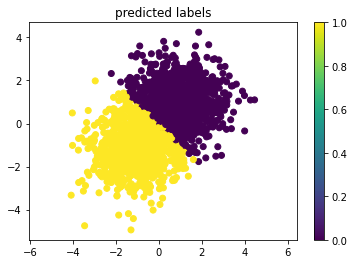

In [5]:
plt.scatter(test_set[:, 0], test_set[:, 1], c=closest_cluster_indices)
plt.colorbar()
plt.axis("equal")
plt.title("predicted labels")

Note that K-means clustering is unsupervised and therefore clusters are learned but the label may be different.
For the nonlinearly separable dataset the kernel trick could be applied and distances would then need to be compute in the kernel space. Another possibility is to introduce more clusters which would, however, yield unnecessary fragmentation.